In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
olympics = pd.read_csv('dataset_olympics.csv', header="infer", sep=",")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
##Dimensión del dataset
olympics.shape

(70000, 15)

In [41]:
#Información de la estructura del dataset
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [ ]:
##Verifico los datos faltantes
(
olympics.isna().sum().reset_index()
    .rename(columns={"index": "variable", 0: "count"})
    .assign(percent = lambda x: 100*x["count"]/olympics.shape[0])
    .sort_values(by="count", ascending=True)
)  

,variable,count,percent
0,ID,0,0.000000
1,Name,0,0.000000
2,Sex,0,0.000000
7,NOC,0,0.000000
6,Team,0,0.000000
10,Season,0,0.000000
9,Year,0,0.000000
8,Games,0,0.000000
12,Sport,0,0.000000
13,Event,0,0.000000


🥇 En la evaluación de la completitud de los datos se evidencia que: la variable más incompleta es Medal con un 86.1%. Esto puede entenderse, ya que no todos los países han ganado medallas a lo largo de los juegos 

In [13]:
##Estadisticas descrptivas del dataset 
olympics.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


🥇 En el caso de Weight, hay un rango amplio de 25 a 214 kg, sugiriendo algunos valores atípicos, sobre todo en el extremo superior.

🥇 La columna Year muestra años de nacimiento que oscilan entre 1896 y 2016, pero el año promedio 1977 indica que la mayoría de las personas nacieron alrededor de las décadas de 1960-1980.

🥇 En Age, la variabilidad es considerable, con edades que van desde los 11 hasta los 88 años. Sin embargo, el 75% de la muestra tiene 28 años o menos, confirmando que la mayoría son jóvenes.

Text(0, 0.5, 'Frecuencia')

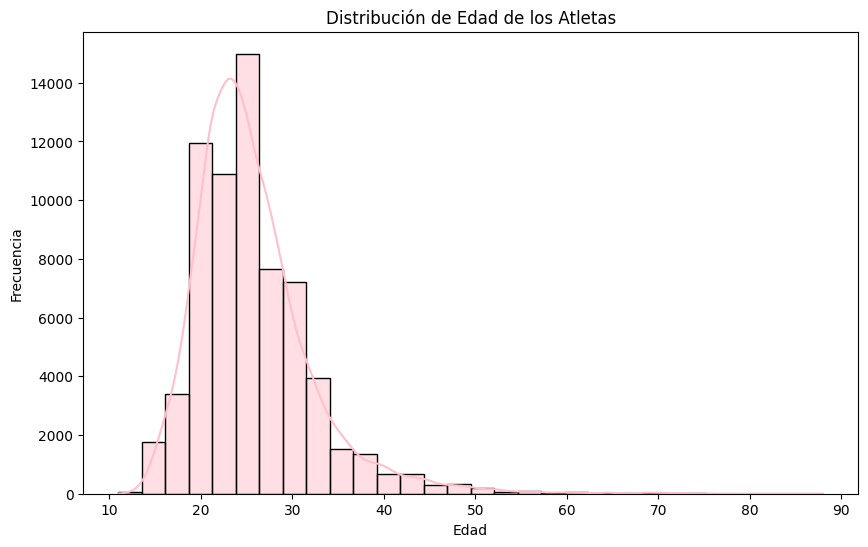

In [7]:
##Distribución de edades de los atletas
plt.figure(figsize=(10, 6))
sns.histplot(olympics['Age'], bins=30, kde=True, color='pink')
plt.title('Distribución de Edad de los Atletas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


Text(0.5, 0, 'Frecuencia')

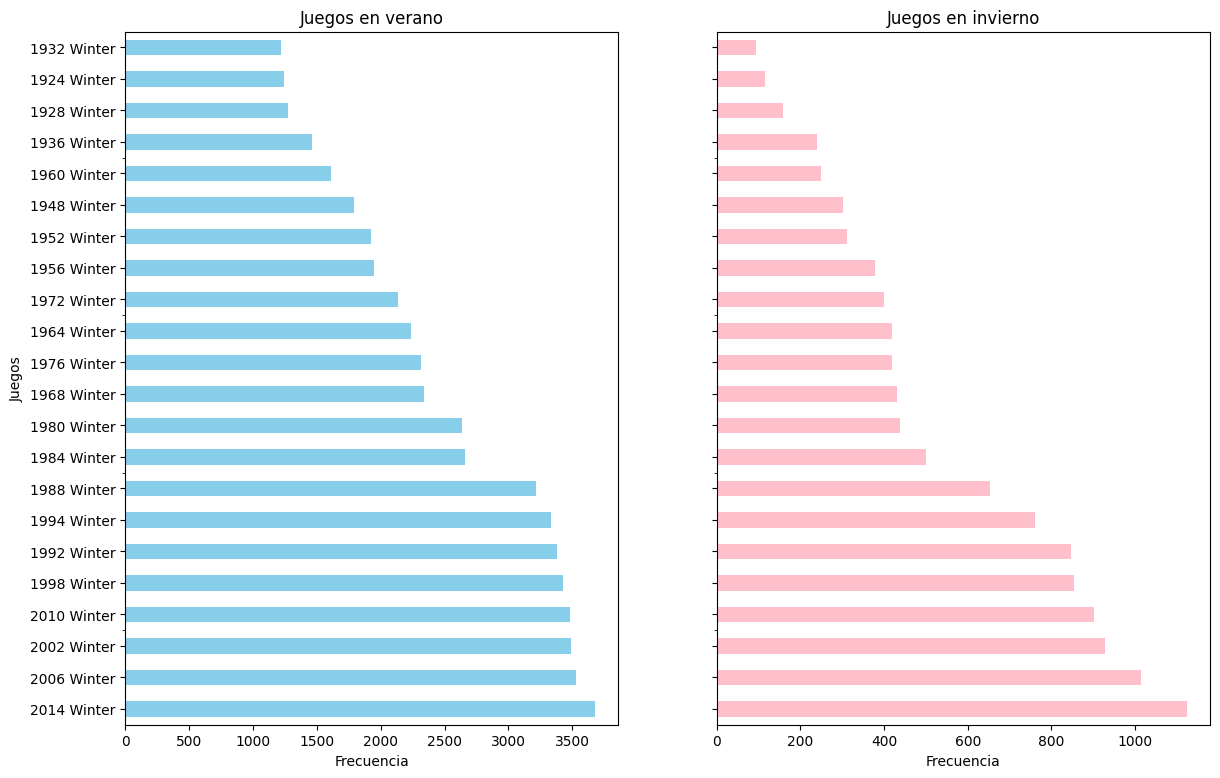

In [17]:
# Filtrar los datos entre Winter y Summer
summer_counts = olympics[olympics['Season'] == 'Summer']['Games'].value_counts()
winter_counts = olympics[olympics['Season'] == 'Winter']['Games'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 9), sharey=True)

# Gráfico para los juegos de verano
summer_counts.plot(
    kind="barh",
    ax=axes[0],
    color="skyblue",
    title="Juegos en verano"
)

# Gráfico para los juegos de invierno
winter_counts.plot(
    kind="barh",
    ax=axes[1],
    color="pink",
    title="Juegos en invierno"
)

axes[0].set_ylabel("Juegos")
axes[1].set_ylabel("")
axes[0].set_xlabel("Frecuencia")
axes[1].set_xlabel("Frecuencia")




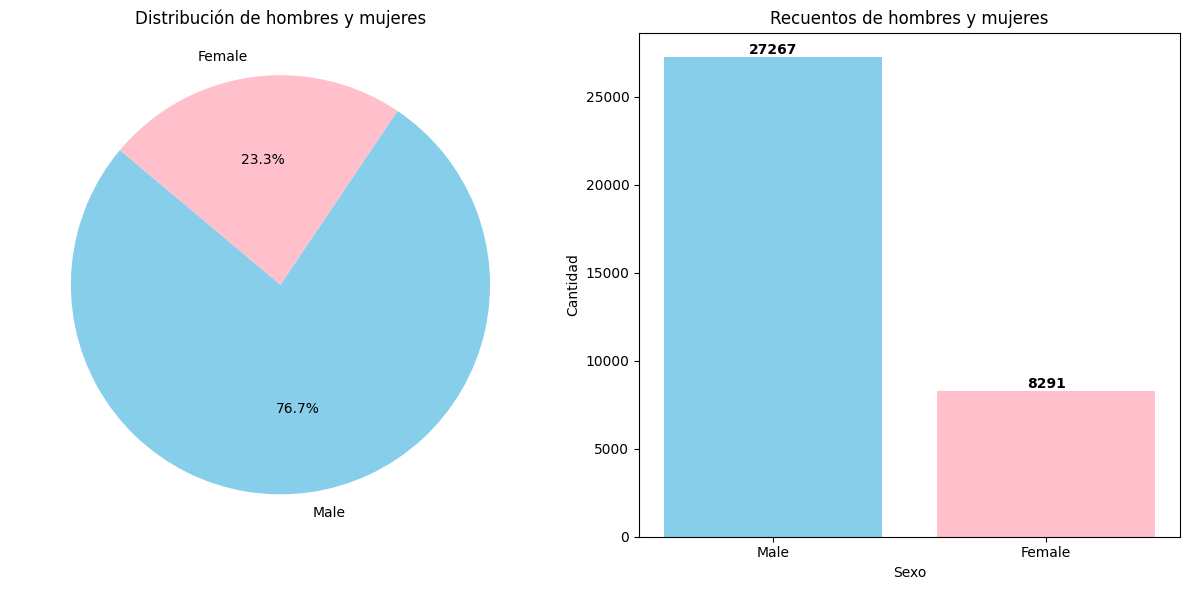

In [27]:
# Mapear valores de sexo y contar
name_sex_counts = olympics.groupby(['Name', 'Sex']).size().reset_index(name='Count')
name_sex_counts['Sex'] = name_sex_counts['Sex'].map({'M': 'Male', 'F': 'Female'})
sex_counts = name_sex_counts['Sex'].value_counts()

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico circular
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=140)
axes[0].set_title('Distribución de hombres y mujeres')
axes[0].axis('equal')  

# Gráfico de barras
bars = axes[1].bar(sex_counts.index, sex_counts, color=['skyblue', 'pink'])
axes[1].set_title('Recuentos de hombres y mujeres')
axes[1].set_xlabel('Sexo')
axes[1].set_ylabel('Cantidad')
axes[1].bar_label(bars, fontweight='bold')  # Etiquetas en barras

plt.tight_layout()


🥇 Aproximadamente el 76.7% de los registros corresponden a hombres,mientras que el 23.3% corresponden a mujeres.

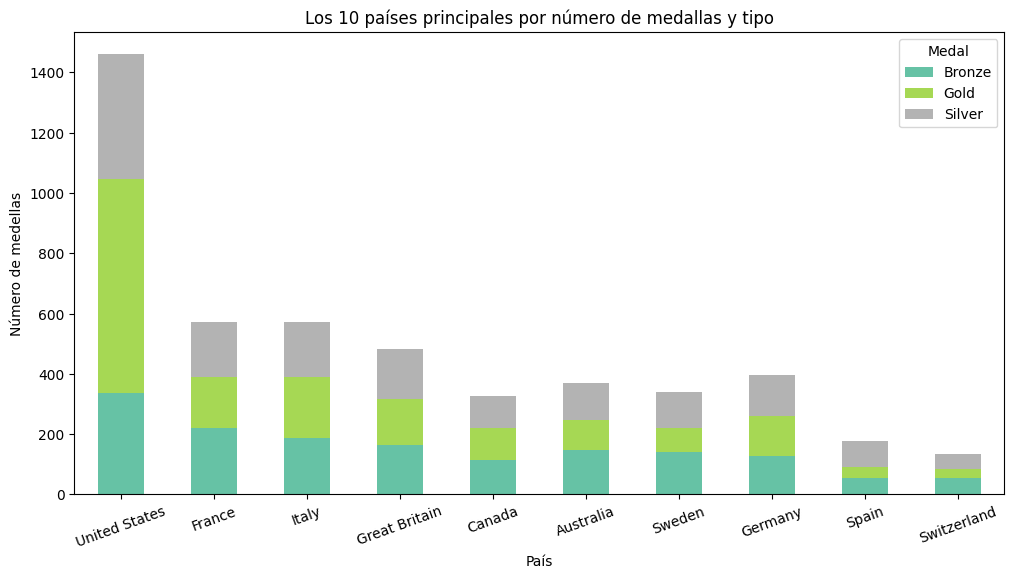

In [56]:
# Filtrar filas con medallas y contar por país y tipo de medalla
country_medals = olympics.dropna(subset=['Medal']).groupby(['Team', 'Medal']).size().unstack(fill_value=0).loc[olympics['Team'].value_counts().head(10).index]

# Graficar
country_medals.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='Set2')
plt.title('Los 10 países principales por número de medallas y tipo')
plt.xlabel('País')
plt.ylabel('Número de medellas')
plt.xticks(rotation=20)



🥇 Estados Unidos lidera con más de 1400 medallas, de las cuales una gran porción son de oro, seguido por Francia, Italia y Gran Bretaña, que tienen aproximadamente entre 400 y 600 medallas cada uno.

C:\Users\boter\AppData\Local\Temp\ipykernel_30796\3555595922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medal', y='Sport', data=medals_by_sport.head(10), palette='Set2')


Text(0, 0.5, 'Deporte')

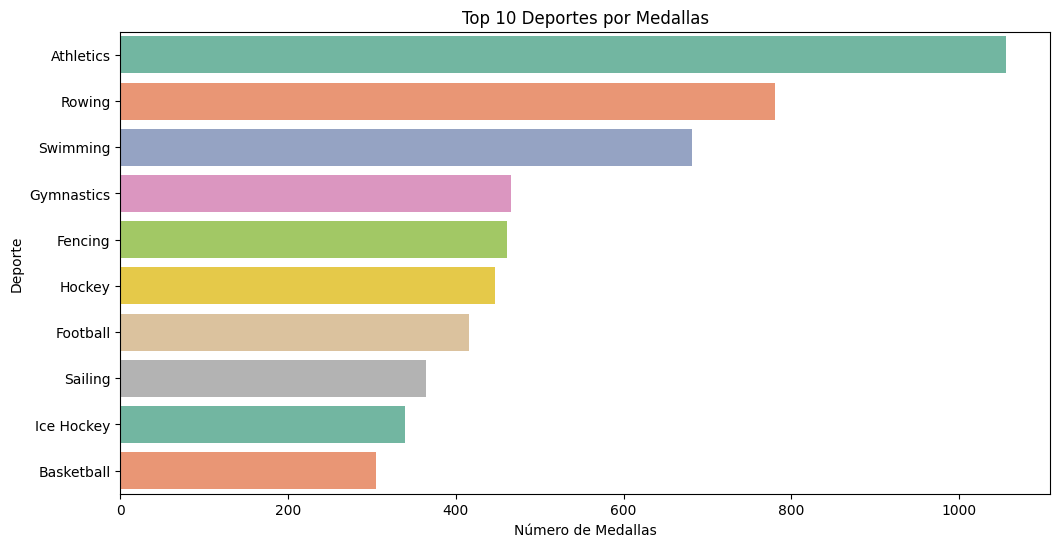

In [74]:
# Medallas por deporte
medals_by_sport = olympics.groupby('Sport')['Medal'].count().reset_index()
medals_by_sport = medals_by_sport[medals_by_sport['Medal'] > 0].sort_values(by='Medal', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Medal', y='Sport', data=medals_by_sport.head(10), palette='Set2')
plt.title('Top 10 Deportes por Medallas')
plt.xlabel('Número de Medallas')
plt.ylabel('Deporte')

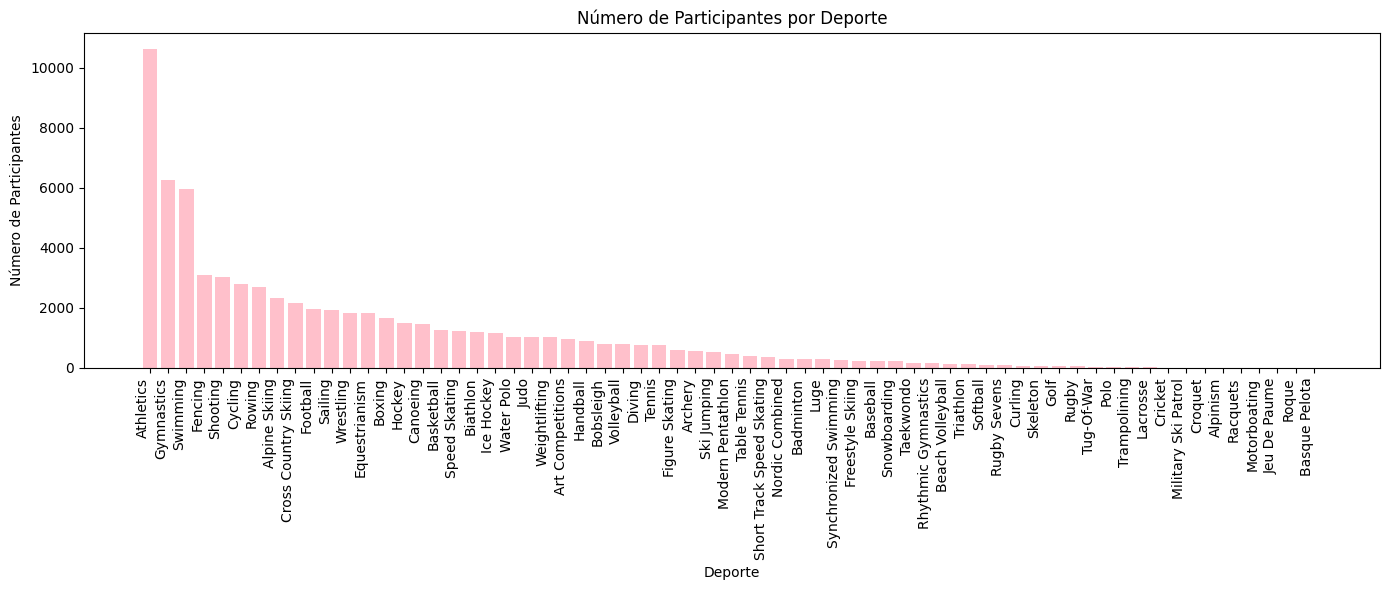

In [68]:
#Participantes por deporte
sports_counts = olympics['Sport'].value_counts()

plt.figure(figsize=(14, 6))
plt.bar(sports_counts.index, sports_counts.values, color='pink')
plt.xlabel('Deporte')
plt.ylabel('Número de Participantes')
plt.title('Número de Participantes por Deporte')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()


🥇 Las disciplinas con mayor cantidad de participantes son Athletics, Gymnastics, y Swimming.

<Figure size 1200x600 with 0 Axes>

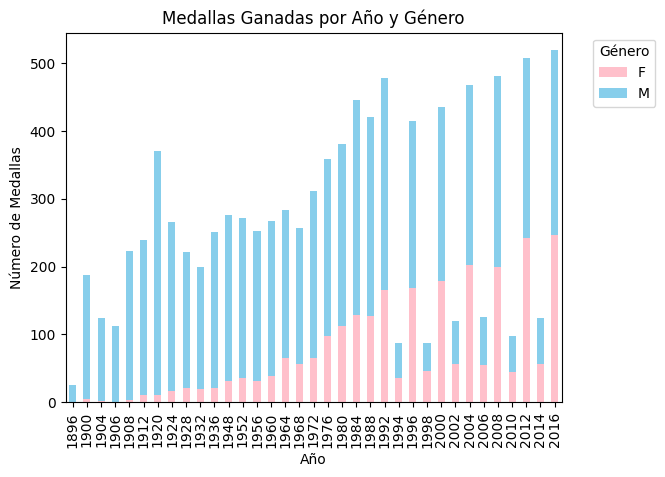

In [31]:
# Agrupación por año y género para contar las medallas
medals_gender_year = olympics.groupby(['Year', 'Sex'])['Medal'].count().unstack().fillna(0)


plt.figure(figsize=(12, 6))
medals_gender_year.plot(kind='bar', stacked=True, color=['pink', 'skyblue']) 
plt.title('Medallas Ganadas por Año y Género')
plt.xlabel('Año')
plt.ylabel('Número de Medallas')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')


Text(120.72222222222221, 0.5, 'Edad')

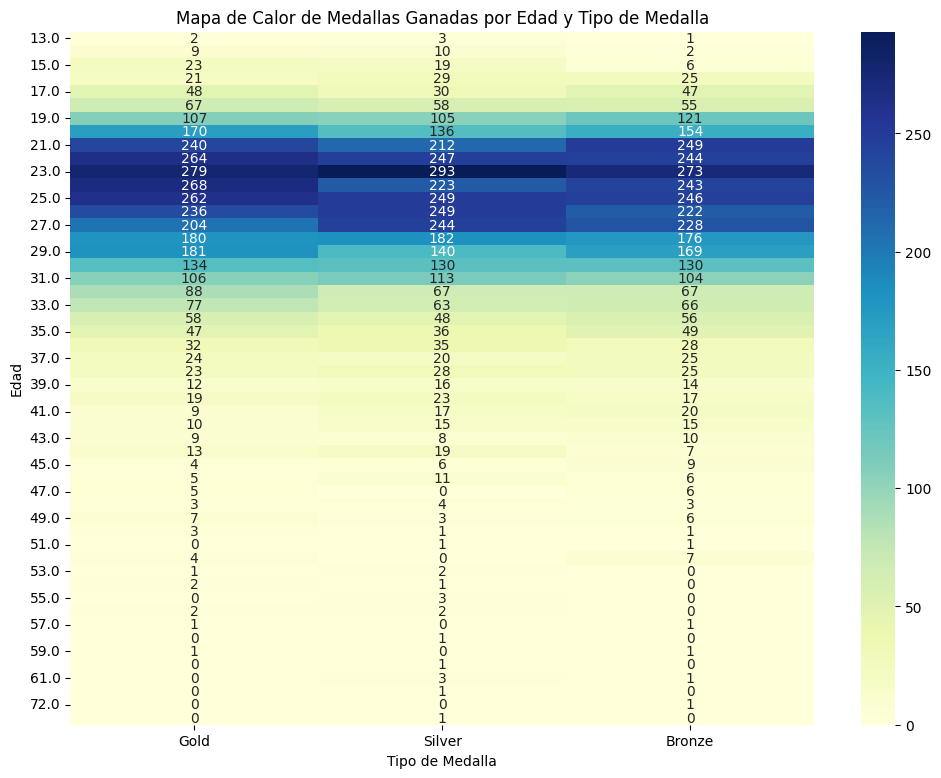

In [89]:
age_medals = olympics.groupby(['Age', 'Medal']).size().unstack(fill_value=0)

plt.figure(figsize=(12,9))
sns.heatmap(age_medals[['Gold', 'Silver', 'Bronze']], annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Correlación entre Medallas Ganadas por Edad y Tipo de Medalla')
plt.xlabel('Tipo de Medalla')
plt.ylabel('Edad')


ID           Axes(0.125,0.653529;0.352273x0.226471)
Age       Axes(0.547727,0.653529;0.352273x0.226471)
Height       Axes(0.125,0.381765;0.352273x0.226471)
Weight    Axes(0.547727,0.381765;0.352273x0.226471)
Year             Axes(0.125,0.11;0.352273x0.226471)
dtype: object

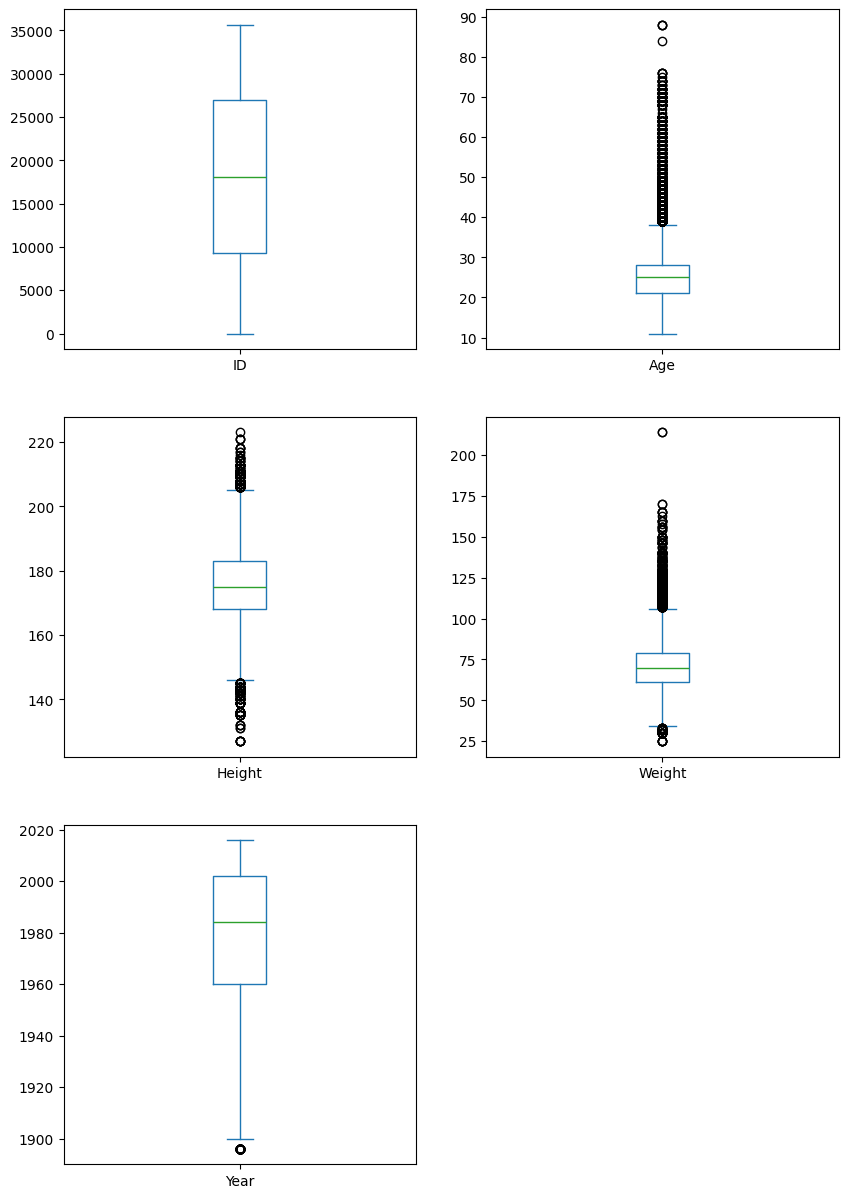

In [ ]:
## Caja de bigotes 
olympics.plot(kind = "box" , 
              subplots = True , 
              figsize = (10,15) , 
              layout = (3,2)
              )

🥇 Este gráfico de caja nos ofrecen una instantánea visual de cómo se distribuyen los datos de edad, altura, peso y año de nacimiento.Por ejemplo, la altura de las personas se concentra principalmente entre 160 y 180 centímetros. Aunque hay algunas personas bastante más altas o más bajas que el promedio. Similar a esto, el peso se distribuye principalmente entre 50 y 100 kilogramos. Sin embargo, existen casos de personas con pesos significativamente menores o mayores.

C:\Users\boter\AppData\Local\Temp\ipykernel_6164\3468039473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=olympics, y="Year", order=year_order, palette="coolwarm", dodge= False)


Text(0, 0.5, 'Año')

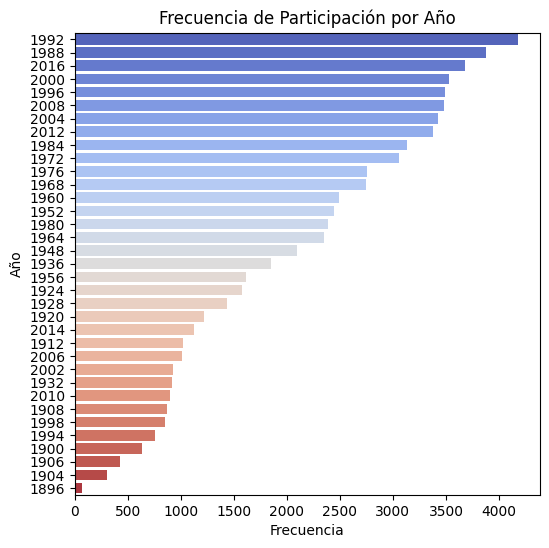

In [26]:
## Años distintos en los que se celebraron los Juegos Olímpicos en el conjunto de datos sin que se repitan
olympics['Year'].unique()
## Grafica
year_order = olympics['Year'].value_counts().index
plt.figure(figsize=(6, 6))
sns.countplot(data=olympics, y="Year", order=year_order, palette="coolwarm", dodge= False)  
plt.title('Frecuencia de Participación por Año')
plt.xlabel('Frecuencia')
plt.ylabel('Año')

🥇 El año de más participación de atletas fue en 1992

         Sport  Year  Medals
44   Athletics  1896      24
45   Athletics  1900      61
46   Athletics  1904      52
47   Athletics  1906     120
48   Athletics  1908     198
..         ...   ...     ...
750   Swimming  2000     412
751   Swimming  2004     400
752   Swimming  2008     453
753   Swimming  2012     387
754   Swimming  2016     383

[143 rows x 3 columns]


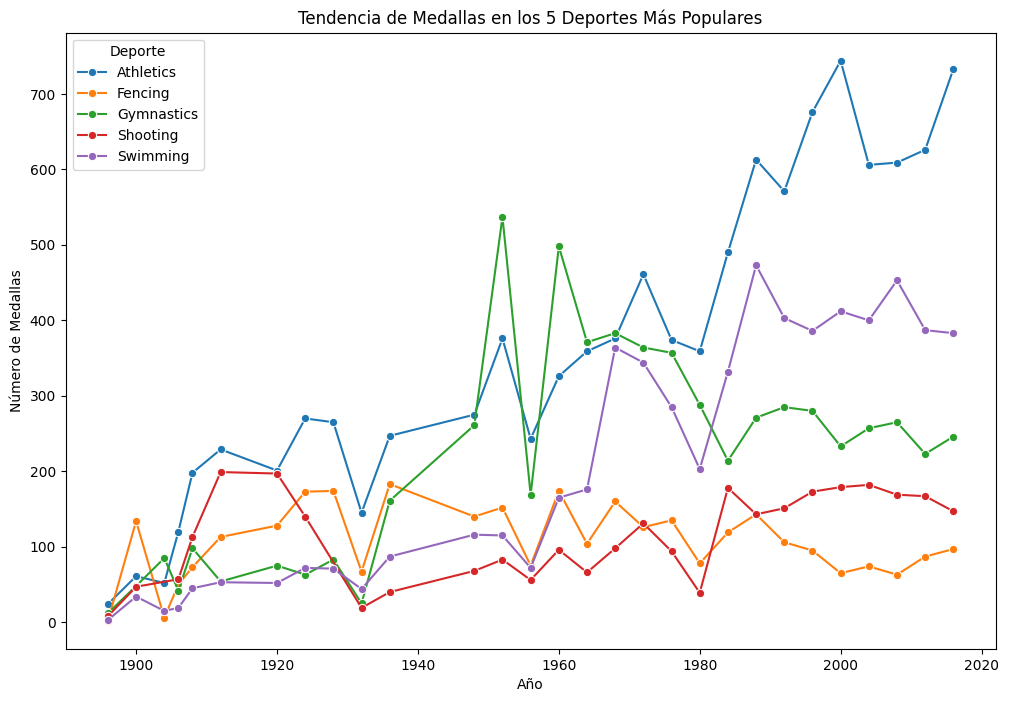

In [20]:
medals_by_sport = olympics.groupby(['Sport', 'Year']).size().reset_index(name='Medals')
top_sports = medals_by_sport.groupby('Sport')['Medals'].sum().nlargest(5).index
popular_sports = medals_by_sport[medals_by_sport['Sport'].isin(top_sports)]


plt.figure(figsize=(12, 8))
sns.lineplot(popular_sports, 
             x='Year', 
             y='Medals', 
             hue='Sport', 
             marker= 'o')
plt.title('Tendencia de Medallas en los 5 Deportes Más Populares')
plt.xlabel('Año')
plt.ylabel('Número de Medallas')
plt.legend(title='Deporte')
